## Get Price Information of Asset

In [2]:
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yahoo_fin.stock_info as yf_info
from tqdm import tqdm

In [3]:
dow_list = yf_info.tickers_dow()
nasdaq_list = yf_info.tickers_nasdaq()
sp500_list = yf_info.tickers_sp500()

In [4]:
tickers = dow_list

In [5]:
all_data = {}
for ticker in tqdm(tickers):
    all_data[ticker] = pdr.DataReader(ticker, 'yahoo', start = '2000-01-01')['Adj Close']

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [01:11<00:00,  2.38s/it]


In [6]:
dow_price = pd.DataFrame(all_data)
dow_price.pct_change()
#dow_price.rolling(window=20).mean().tail()

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
1999-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,0.088753,0.047867,-0.054135,-0.030166,0.033200,NaN,0.008751,-0.034632,0.021367,NaN,...,0.006511,-0.001607,-0.029004,-0.021677,-0.020408,0.011765,NaN,-0.026396,-0.023505,-0.033454
2000-01-04,-0.084310,-0.076465,-0.037758,-0.001556,-0.012854,NaN,-0.056102,0.000000,0.058577,NaN,...,-0.035120,-0.033780,-0.054546,-0.019242,-0.013258,-0.012791,NaN,-0.032325,-0.037199,-0.037418
2000-01-05,0.014633,0.034408,-0.025400,0.062305,0.023438,NaN,-0.003064,0.017937,0.041502,NaN,...,0.039272,0.010543,0.057693,-0.019025,-0.007677,-0.002356,NaN,0.033405,0.011364,-0.020408
2000-01-06,-0.086538,0.016632,0.020374,0.010264,0.050890,NaN,-0.016595,0.042584,-0.039848,NaN,...,0.008295,-0.033498,-0.005195,0.046060,0.019342,0.036600,NaN,-0.005079,-0.029213,0.010912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-07,0.009084,-0.004096,0.007631,0.006622,0.020275,-0.002507,0.020022,0.007148,0.012708,0.023618,...,0.015869,0.005936,0.020497,0.008003,0.013863,0.026506,0.017836,0.000186,0.020038,0.011772
2021-10-08,-0.002722,-0.000813,0.004934,-0.000397,-0.003014,-0.007648,0.001091,0.022426,-0.005458,0.003418,...,-0.015987,0.000000,0.004149,-0.004146,0.000572,0.009291,-0.001214,-0.012245,-0.009822,0.003016
2021-10-11,-0.000630,-0.010768,-0.009649,0.000265,-0.011632,0.004661,-0.002723,-0.008515,-0.018219,-0.008176,...,-0.008682,-0.002103,-0.014428,0.004163,-0.006992,-0.008495,-0.022408,-0.019910,0.000844,-0.000931


## Get "10yr Treasury Yield" from "FRED"

In [7]:
Treasury_Note_10y = pdr.DataReader('DGS10', 'fred', start = '2000-01-01')
Treasury_Note_10y

,DGS10
DATE,
2000-01-03,6.58
2000-01-04,6.49
2000-01-05,6.62
2000-01-06,6.57
2000-01-07,6.52
...,...
2021-10-06,1.53
2021-10-07,1.58
2021-10-08,1.61


## Calculate Correlation between "Stock Price" and "10yr Treasury Note Yield"

In [18]:
df = pd.concat([Treasury_Note_10y, dow_price], axis = 1)
df_corr = df.pct_change()['DGS10'].rolling(window = 20, axis=0).corr(df.pct_change().rolling(window = 20, axis=0))

In [19]:
df_corr.dropna()

,DGS10,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
2019-04-17,1.0,0.271386,0.314330,0.741429,0.454206,0.705557,0.541892,0.672634,0.119094,0.253854,...,0.099903,0.544115,0.646001,0.246882,0.212157,-0.196975,0.467100,-0.297634,0.162527,0.420407
2019-04-18,1.0,0.352530,0.341496,0.645091,0.441745,0.684985,0.559849,0.694477,0.125481,0.258535,...,0.118822,0.566434,0.646061,0.257644,0.147811,-0.226306,0.510826,-0.309565,0.167505,0.427040
2019-04-19,1.0,0.020297,0.117412,0.466218,0.305921,0.522373,0.393471,0.496403,-0.105038,0.235245,...,0.115788,0.192863,0.258475,-0.056046,0.238754,-0.411204,0.207782,0.050282,0.139868,0.281979
2019-04-22,1.0,-0.045365,0.116564,0.385162,0.332614,0.516791,0.399111,0.465693,-0.075751,0.205899,...,0.149242,0.211620,0.142796,-0.065247,0.174363,-0.361878,0.192302,0.088552,0.132510,0.216903
2019-04-23,1.0,-0.229421,0.073287,0.309436,0.340488,0.536659,0.306751,0.498271,-0.043148,0.224990,...,0.110638,0.102567,0.216433,0.204949,0.120114,-0.423304,0.291680,0.237898,0.165817,0.174954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-07,1.0,0.040604,0.241488,0.292962,0.012882,0.552517,0.356751,0.341026,0.315528,0.100645,...,-0.175570,-0.122470,0.002264,0.156903,0.337678,0.146934,0.132155,0.005895,0.427217,0.501516
2021-10-08,1.0,0.174755,0.295776,0.329564,0.070018,0.563862,0.401814,0.405002,0.347530,0.122117,...,-0.167241,-0.108524,-0.004866,0.141559,0.398515,0.256693,0.179270,0.003233,0.508673,0.528096
2021-10-11,1.0,0.198409,0.424654,0.381089,0.118730,0.604203,0.379080,0.439055,0.410169,0.154837,...,-0.176068,-0.095097,-0.049200,0.209517,0.500051,0.399010,0.192208,0.117249,0.504217,0.514822
2021-10-12,1.0,0.180492,0.488847,0.312265,0.077606,0.594914,0.350658,0.485307,0.330933,0.107135,...,-0.216079,-0.027825,-0.119155,0.217888,0.413264,0.408458,0.174624,0.178626,0.440104,0.502269


In [20]:
print(df_corr.columns)

Index(['DGS10', 'AAPL', 'AMGN', 'AXP', 'BA', 'CAT', 'CRM', 'CSCO', 'CVX',
       'DIS', 'DOW', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO',
       'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'V', 'VZ',
       'WBA', 'WMT'],
      dtype='object')


In [21]:
df_corr.drop(['DGS10'], axis = 1).dropna().tail()

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
2021-10-07,0.040604,0.241488,0.292962,0.012882,0.552517,0.356751,0.341026,0.315528,0.100645,0.304241,...,-0.175570,-0.122470,0.002264,0.156903,0.337678,0.146934,0.132155,0.005895,0.427217,0.501516
2021-10-08,0.174755,0.295776,0.329564,0.070018,0.563862,0.401814,0.405002,0.347530,0.122117,0.306387,...,-0.167241,-0.108524,-0.004866,0.141559,0.398515,0.256693,0.179270,0.003233,0.508673,0.528096
2021-10-11,0.198409,0.424654,0.381089,0.118730,0.604203,0.379080,0.439055,0.410169,0.154837,0.331687,...,-0.176068,-0.095097,-0.049200,0.209517,0.500051,0.399010,0.192208,0.117249,0.504217,0.514822
2021-10-12,0.180492,0.488847,0.312265,0.077606,0.594914,0.350658,0.485307,0.330933,0.107135,0.298800,...,-0.216079,-0.027825,-0.119155,0.217888,0.413264,0.408458,0.174624,0.178626,0.440104,0.502269
2021-10-13,0.168323,0.431884,0.311098,0.075575,0.589685,0.330498,0.469947,0.312810,0.087598,0.297713,...,-0.208341,-0.076586,-0.132488,0.211747,0.401905,0.389845,0.178354,0.153068,0.472172,0.502258


In [22]:
df2 = pd.concat([Treasury_Note_10y, df_corr.drop(['DGS10'], axis = 1)], axis = 1)
df2.dropna().tail()

,DGS10,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
2021-10-05,1.54,0.052163,0.360738,0.288414,0.008262,0.514276,0.417211,0.238464,0.348063,0.026096,...,-0.081115,-0.071117,-0.116003,0.133174,0.267563,0.114808,0.089232,0.129279,0.376939,0.513376
2021-10-06,1.53,0.016783,0.378008,0.281277,-0.033018,0.513671,0.386755,0.258842,0.336277,0.035808,...,-0.093407,-0.088640,-0.139261,0.140872,0.277088,0.068257,0.118390,0.149788,0.402051,0.490683
2021-10-07,1.58,0.040604,0.241488,0.292962,0.012882,0.552517,0.356751,0.341026,0.315528,0.100645,...,-0.175570,-0.122470,0.002264,0.156903,0.337678,0.146934,0.132155,0.005895,0.427217,0.501516
2021-10-08,1.61,0.174755,0.295776,0.329564,0.070018,0.563862,0.401814,0.405002,0.347530,0.122117,...,-0.167241,-0.108524,-0.004866,0.141559,0.398515,0.256693,0.179270,0.003233,0.508673,0.528096
2021-10-12,1.59,0.180492,0.488847,0.312265,0.077606,0.594914,0.350658,0.485307,0.330933,0.107135,...,-0.216079,-0.027825,-0.119155,0.217888,0.413264,0.408458,0.174624,0.178626,0.440104,0.502269


(0.5, 4.5)

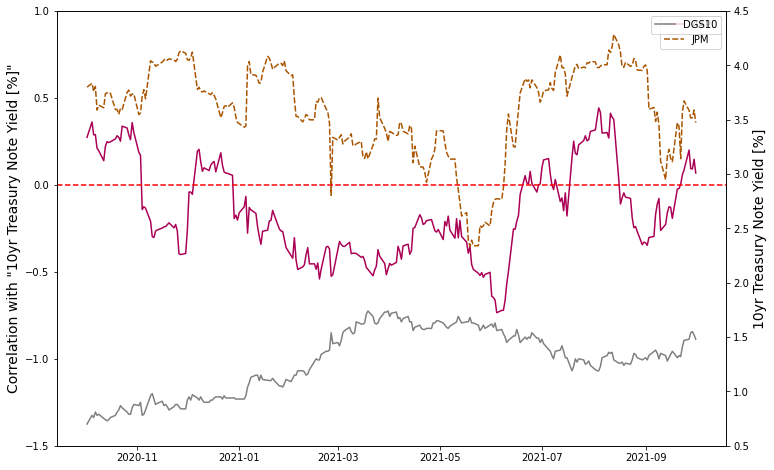

In [31]:
start_date = "2020-10-02"
end_date = "2021-10-02"

fig = plt.figure(figsize = (12,8))
fig.set_facecolor('white')
ax1 = fig.add_subplot()

ax1 = sns.lineplot(data=df2[['AAPL', 'JPM']][start_date:end_date], palette='brg')
ax1.set_ylabel('Correlation with "10yr Treasury Note Yield [%]"', fontsize = 14)
ax1.set_ylim(-1.5,1.0)
plt.axhline(y = 0, color='r', linestyle='--')

ax2 = ax1.twinx()
ax2 = sns.lineplot(data=df2[['DGS10']][start_date:end_date], palette='gray')
ax2.set_ylabel('10yr Treasury Note Yield [%]', fontsize = 14)
ax2.set_ylim(0.5,4.5)